In [1]:
import sys
sys.path.insert(1,'c:/code/gh/pymunk')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import animation
#from IPython.display import HTML

In [3]:
import pymunk
from pymunk.vec2d import Vec2d

Loading chipmunk for Windows (64bit) [c:\code\gh\pymunk\pymunk\chipmunk64.dll]


In [4]:
sys.path.insert(1, "c:/code/gh/pymunk/examples")
from shapes_for_draw_demos import fill_space


In [5]:
space = pymunk.Space()
fill_space(space)


In [8]:
def draw(ax, *objs):
    """Draw one or many pymunk objects on a matplotlib Axes object. It is perfectly fine to pass in a 
    whole Space object.
    
    Objects that can be handled are:
        * pymunk.Space
        * pymunk.Segment
        * pymunk.Circle
        * pymunk.Poly
        * pymunk.Constraint (partial)
    
    If a Space is passed in all shapes in that space will be drawn. 
    Unrecognized objects will be ignored (for example if you pass in a 
    constraint that is not supported).
    
    Typical usage::
    
    >>> fix, ax = matplotlib.subplot()
    >>> pymunk.matplotlib_util.draw(ax, my_space)
    
    You can control the color of a Shape by setting shape.color to the color 
    you want it drawn in.
    
    >>> my_shape.color = (255, 0, 0) # will draw my_shape in red
    
    If you do not want a shape to be drawn, set shape.ignore_draw to True.
    
    >>> my_shape.ignore_draw = True
    
    (However, if you want to ignore most shapes its probably more performant 
    to only pass in those shapes that you want to be drawn to the draw method)
    
    See matplotlib_util.demo.py for a full example
    
    :Param:
            ax: matplotlib.Axes
                A matplotlib Axes object.
            objs : One or many objects to draw.
                Can be either a single object or a list like container with 
                objects.
    
    """
        
    for o in objs:
        if isinstance(o, pymunk.Space):
            _draw_space(o, ax=ax)
        elif isinstance(o, pymunk.Shape):
            _draw_shape(o, ax=ax)
        elif isinstance(o, pymunk.Constraint):
            _draw_constraint(o, ax=ax)
        elif hasattr(o, '__iter__'):
            for oo in o:
                draw(ax, oo)
                
def _draw_space(space, **kwargs):
    
    for s in space.shapes:
        if not (hasattr(s, "ignore_draw") and s.ignore_draw):
            _draw_shape(s, **kwargs)
            
    for c in space.constraints:
        if not (hasattr(c, "ignore_draw") and c.ignore_draw):
            _draw_constraint(s, **kwargs)

def _draw_shape(shape, **kwargs):
    
    if isinstance(shape, pymunk.Circle):
        _draw_circle(shape, **kwargs)
    elif isinstance(shape, pymunk.Segment):
        _draw_segment(shape, **kwargs)
    elif  isinstance(shape, pymunk.Poly):
        _draw_poly(shape, **kwargs)
        
def _draw_circle(circle, ax=None):
    circle_center = circle.body.position + circle.offset.rotated(circle.body.angle)
    
    if hasattr(circle, "color"):
        color = circle.color
        if isinstance(circle.color, tuple) and len(circle.color) == 3:
            if isinstance(circle.color[0], int):
                color = circle.color[0]/255, circle.color[1]/255, circle.color[2]/255
                
    elif circle.body.body_type == pymunk.Body.STATIC:
        color = "dimgrey"
    else:
        color = "red"
    
    p = plt.Circle(circle_center, circle.radius, facecolor=color, edgecolor='None')
    
    ax.add_patch(p)
    
    circle_edge = circle_center + Vec2d(circle.radius, 0).rotated(circle.body.angle)
    lw = 3 if circle.radius > 20 else 1
    lw = 1
    color = "darkred"
    line = plt.Line2D([circle_center.x, circle_edge.x], [circle_center.y, circle_edge.y], linewidth=lw, color=color)
    line.set_solid_capstyle("round")
    ax.add_line(line)
    

def _draw_segment(segment, ax=None):
    body = segment.body
    p1 = body.position + segment.a.rotated(body.angle)
    p2 = body.position + segment.b.rotated(body.angle)
    
    lw = max(int(segment.radius*2),1)
    
    if hasattr(segment, "color"):
        color = segment.color  
    elif segment.body.body_type == pymunk.Body.STATIC:
        color = "dimgrey"
    else:
        color = "blue"
    line = plt.Line2D([p1.x, p2.x], [p1.y, p2.y], linewidth=lw, color=color)
    line.set_solid_capstyle("round")
    ax.add_line(line)
    
def _draw_poly(poly, ax=None):
    offset = 0,0
    angle = 0
    if poly.body != None:
        offset = poly.body.position
        angle = poly.body.angle
    ps = [p.rotated(angle) + offset for p in poly.get_vertices()]
    
    lw = max(int(poly.radius*2),1)
    
    if hasattr(poly, "color"):
        color = poly.color  
    elif poly.body.body_type == pymunk.Body.STATIC:
        color = "dimgrey"
    else:
        color = "green"
    p = plt.Polygon(ps, linewidth=lw, joinstyle="round", facecolor=color, edgecolor=color)
    ax.add_patch(p)

def _draw_constraint(constraint, ax=None):
    #print(ax)
    pass

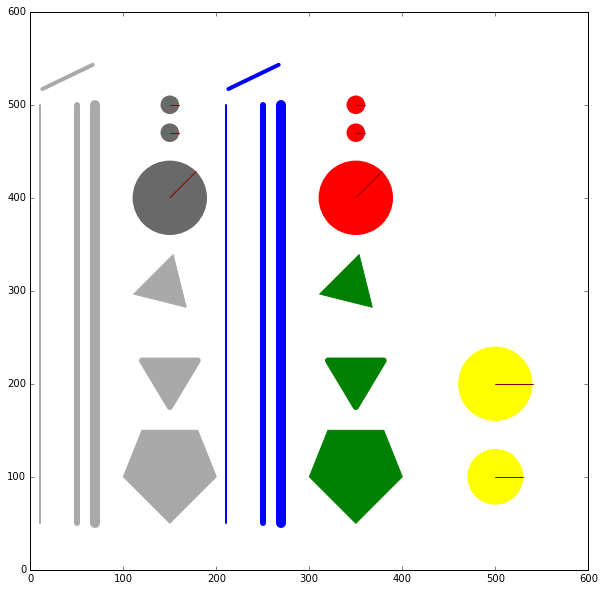

In [9]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")

draw(ax, space)